<a href="https://colab.research.google.com/github/DeepakKumarSingh003/-Demand-Prediction-for-Public-Transport-Movement-in-Nirobi/blob/main/Public_Transport_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [ ]:
#Mount Google drive to fetch Dataset.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
#importing necessary libraries
import numpy as np
import pandas as pd
#libraries for ploting graphs
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#store dataset as df
transport_demand_df = pd.read_csv("/content/drive/MyDrive/Alma better Projects/Regression ML-Demand prediction/train_revised.csv")

#Overview Of  Our DataSet.

In [ ]:
#Rows and columns count
transport_demand_df.shape

(51645, 10)

In [ ]:
#Top 5 and Bottom 5 Rows
display(transport_demand_df.head(),  transport_demand_df.tail())

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


In [ ]:
#Basic information from features
transport_demand_df.info()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [ ]:
#Function for detail information about data frame.
def Detailed_info(DataFrame):
  '''This Function will give detailed information with clearity about the DataFrame it will provide:
      1.Columns name,2.Data type,3.Unique in Data frame,4.Total nulls,5.Not Nulls,6.Percentage of Nulls
  '''
#Insert columns in place of index  
  info = pd.DataFrame(index=DataFrame.columns)
#Inser Data type of columns as dtype into  Dataframe in first place   
  info['dtype'] = DataFrame.dtypes
#Inser Unique elements in each columns into  Dataframe at second place    
  info['Unique'] = DataFrame.nunique()
#Inser NUll elements in each columns into  Dataframe at third place  
  info['Num_ofNullValues'] = DataFrame.isnull().sum()
#Inser Not NUll elements in each columns into  Dataframe at fourth place  
  info['Num_nonNullValues'] = DataFrame.count()
  return info

In [ ]:
Detailed_info(transport_demand_df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
ride_id,int64,6249,0,51645
seat_number,object,61,0,51645
payment_method,object,2,0,51645
payment_receipt,object,51645,0,51645
travel_date,object,149,0,51645
travel_time,object,78,0,51645
travel_from,object,17,0,51645
travel_to,object,1,0,51645
car_type,object,2,0,51645
max_capacity,int64,2,0,51645


**Observation**
* There are no nulls in our data set.
* Most of the feature are object type.
* Continuous features are very less.
* Target variable is not provided we have to Extract it from the given features.

#Generating Target Variable & Feature Selection as per Problem Statement.

**Problem Statement**

We have to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride.
* i.e. for a specific route on a specific date and time.
* We have to predict the total tickets to be booked for a journey from different 17 location toward Nirobi on specific day and during specific period of time.

**Feature Description:**
* ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* seat_number: seat assigned to ticket
* payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* payment_receipt: unique id number for ticket purchased from Mobiticket
* travel_date: date of ride departure. (MM/DD/YYYY)
* travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* travel_from: town from which ride originated
* travel_to: destination of ride. All rides are to Nairobi.
* car_type: vehicle type (shuttle or bus)
* max_capacity: number of seats on the vehicle

**Note**
* Using above feature we have to Extract Traget variable That can be total "Bookings" fro each individual ride_id.
* we have to check which of the above features are relevant for our Target variable to predict.
* keep the Relevant features and discard others. 
 

**Extracting Target Variable**
* As we have unique vehicle ids for routes we will count the total unique ride_id's which is Total Bookings of a particular day at particular route and specific time.

In [ ]:
#Count the id,s and map them with given id number.
ride_id_dict = {} 
for ride_id in transport_demand_df["ride_id"]:
    if not ride_id in ride_id_dict:
        ride_id_dict[ride_id] = 1
    else:
        ride_id_dict[ride_id] += 1

In [ ]:
#length of dictionary and length of ride_id unique should be same
display(len(ride_id_dict),len(transport_demand_df.ride_id.unique()))

6249

6249

In [ ]:
#drop all the duplicates
transport_demand_df.drop_duplicates(subset="ride_id",inplace=True)
transport_demand_df.reset_index(drop= True, inplace=True)

In [ ]:
#store the dictionary as per the ride_id
for i in range(len(transport_demand_df)):
    ride_id = transport_demand_df.loc[i]["ride_id"]
    transport_demand_df.at[i,"Bookings"] = ride_id_dict[ride_id]

**Note**
* we heve use the above method of mapping target(Total Bookings) with ride_id to extract the Target variable there are another methods also.
* The size of the dataset after Extracting target variable should be equal to length of unique ride_id as each individual ride_id have a corresponding Bookings over individual day.



In [ ]:
#Dataset with Target
transport_demand_df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,Bookings
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1.0
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1.0
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1.0
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5.0
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31.0


#Basic Feature Selection


**Uniue Value Features**

In [ ]:
#check unique counts of features
print(f"Total values counts of ride_id:-{len(transport_demand_df.ride_id.unique())}")
print(f"Total values counts of payment_receipt:-{len(transport_demand_df.payment_receipt.unique())}")


Total values counts of ride_id:-6249
Total values counts of payment_receipt:-6249


**Constant Value & Imbalance Feature**

In [ ]:
#check value count
print(transport_demand_df.payment_method.value_counts())
print("\n")
print(transport_demand_df.travel_to.value_counts())

Mpesa    6211
Cash       38
Name: payment_method, dtype: int64


Nairobi    6249
Name: travel_to, dtype: int64


**Multicollinear Features**

In [ ]:
#one_hot encoding
Dummy=pd.get_dummies(transport_demand_df["car_type"])

In [ ]:
#concate
check=pd.concat([Dummy,transport_demand_df[["max_capacity","Bookings"]]],axis=1)

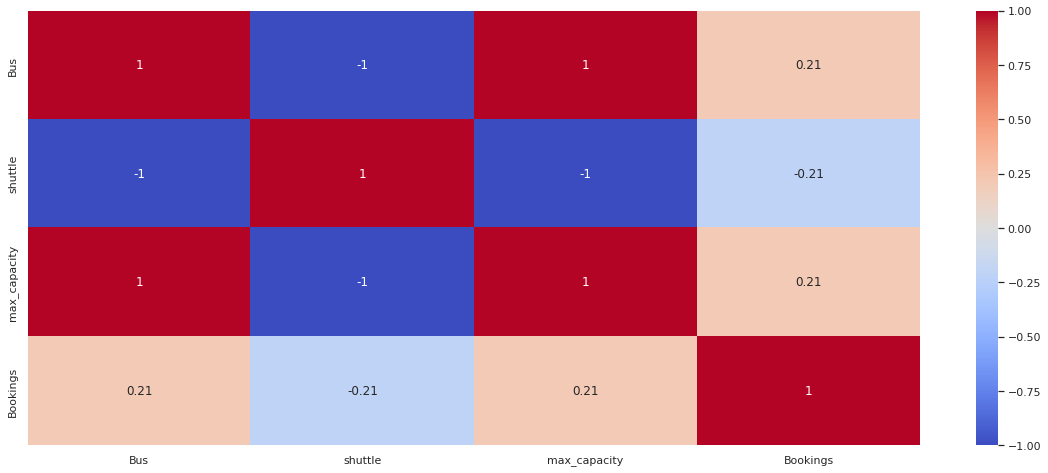

In [ ]:
#Heat map to check correlation
sns.heatmap(check.corr(),cmap='coolwarm',annot=True)
plt.show()

In [ ]:
#Drop features from above observation
transport_demand_df.drop(transport_demand_df[["travel_to","ride_id","payment_receipt","car_type","seat_number","payment_method"]],axis=1,inplace=True)

**Conclusion**
* We Drop all those Features which has all the values unique like payment_receipt and ride_id(as we extracted counts of ride_id).
* We Drop the feature travel_to as it has constant value  that is Nairobi.
* We Drop payment_method as this feature is heavy imbalance.
* car_type nad max_capacity both are multicollinear which we validated with heat map.
* From the problem statement point of view seat no. is not an important feature in determining Bookings.so we drop that too.

#Feature Engineering

In [ ]:
#Check if Bookings more than maximum seat.
More_Bookings_less_seat=transport_demand_df[transport_demand_df['max_capacity']<transport_demand_df['Bookings']].index
display(transport_demand_df[transport_demand_df['max_capacity']<transport_demand_df['Bookings']], More_Bookings_less_seat,len(More_Bookings_less_seat))

,travel_date,travel_time,travel_from,max_capacity,Bookings
1669,13-02-18,7:00,Kisii,11,12.0
1924,09-01-18,7:00,Sirare,49,50.0
1978,07-02-18,9:30,Kisii,11,12.0
2067,05-02-18,10:30,Kisii,11,12.0
2076,05-02-18,9:10,Kisii,11,12.0
2166,04-02-18,10:51,Kisii,11,12.0
2342,31-01-18,9:50,Kisii,11,12.0
3642,20-12-17,10:00,Kisii,11,12.0
3775,19-12-17,7:20,Kisii,11,12.0
4134,14-12-17,10:57,Kisii,11,12.0


Int64Index([1669, 1924, 1978, 2067, 2076, 2166, 2342, 3642, 3775, 4134, 4425,
            4670, 5020],
           dtype='int64')

13

In [ ]:
#drop abnormal Bookings
transport_demand_df.drop(index=More_Bookings_less_seat,inplace=True)

**Observation**
* we have 13 Bookings which are more than available seats hence we will drop them.

In [ ]:

display(transport_demand_df.head(5),transport_demand_df.tail(5))

,travel_date,travel_time,travel_from,max_capacity,Bookings
0,17-10-17,7:15,Migori,49,1.0
1,19-11-17,7:12,Migori,49,1.0
2,26-11-17,7:05,Keroka,49,1.0
3,27-11-17,7:10,Homa Bay,49,5.0
4,27-11-17,7:12,Migori,49,31.0


,travel_date,travel_time,travel_from,max_capacity,Bookings
6244,20-04-18,23:10,Ndhiwa,49,11.0
6245,20-04-18,7:05,Ndhiwa,49,11.0
6246,20-04-18,7:09,Rongo,49,1.0
6247,20-04-18,8:00,Awendo,49,1.0
6248,14-11-17,5:10,Kisii,49,1.0


**Travel_date**
* **Extracting years ,month ,days ,weeks,day_ofweek from travel_date**
* **Extracting hours from travel_time**

In [ ]:
#Import warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
#Extracting features from Date
transport_demand_df['year'] = pd.DatetimeIndex(transport_demand_df['travel_date']).year
transport_demand_df['month'] = pd.DatetimeIndex(transport_demand_df['travel_date']).month
transport_demand_df["day_ofweek"] = pd.DatetimeIndex(transport_demand_df["travel_date"]).dayofweek
transport_demand_df.drop(["travel_date"],axis=1,inplace=True)

In [ ]:
#express travel time in minutes
transport_demand_df["Time"] = transport_demand_df["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
transport_demand_df.drop(["travel_time"],axis=1,inplace=True)


In [ ]:
#Convert minutes into hours with ceil value
def calculate_time_period(travel_time_In_minutes):
    time_period = (travel_time_In_minutes / 60)
    return time_period

transport_demand_df['Boarding_time'] = transport_demand_df.Time.apply(calculate_time_period)
transport_demand_df.drop(["Time"],axis=1,inplace=True)

In [ ]:
transport_demand_df.head()

,travel_from,max_capacity,Bookings,year,month,day_ofweek,Boarding_time
0,Migori,49,1.0,2017,10,1,7.250000
1,Migori,49,1.0,2017,11,6,7.200000
2,Keroka,49,1.0,2017,11,6,7.083333
3,Homa Bay,49,5.0,2017,11,0,7.166667
4,Migori,49,31.0,2017,11,0,7.200000


**Note**
* It will be better to segregate the time into different Periods of day.

In [ ]:
#Segregate hours into 4 periods of day.
bins = [0, 6, 12, 18,23]
names = ['Mid_night','Day','Aftrenoon','Night']
transport_demand_df['Boarding_period'] = pd.cut(transport_demand_df.Boarding_time, bins, labels=names)
transport_demand_df.drop(["Boarding_time"],axis=1,inplace=True)

In [ ]:
print(transport_demand_df.shape)
transport_demand_df.sample(5)

(6236, 7)


,travel_from,max_capacity,Bookings,year,month,day_ofweek,Boarding_period
519,Kisii,49,2.0,2018,11,5,Day
2403,Kisii,11,8.0,2018,1,1,Mid_night
2466,Homa Bay,49,32.0,2018,1,4,Day
1994,Kehancha,49,19.0,2018,11,3,Day
2805,Kijauri,11,1.0,2018,2,4,Day


**Observation**
* Our final dataset has all the independent features as categorical type.
* we will deal with them using some categorical encoding technique.

# Outliers

**Target Variable**

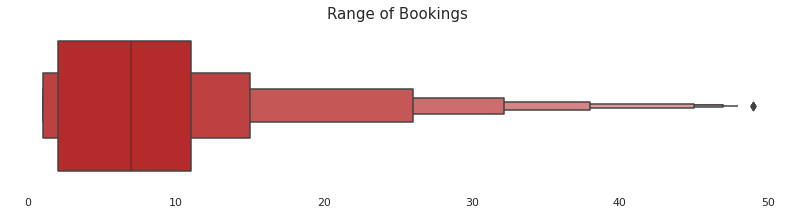

In [ ]:
sns.set_theme(rc={'figure.figsize': (14,3)},style='whitegrid')
sns.boxenplot(x=transport_demand_df['Bookings'],color='#CC1313')
plt.grid(False)
plt.xlabel('')
plt.title('Range of Bookings',size=15)
ax = plt.gca()
for spine in ax.spines.values():
   spine.set_visible(False)

In [ ]:
def out_iqr(df , column):
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    perc=(df1.shape[0]+ df2.shape[0]/len(df[column]))
    return print('Total number of outliers are',df1.shape[0]+ df2.shape[0],"In percentage",((df1.shape[0]+ df2.shape[0])*100/len(df[column])))
          

In [ ]:
out_iqr(transport_demand_df,"Bookings")

The IQR is 9.0
The lower bound value is -11.5
The upper bound value is 24.5
Total number of outliers are 419 In percentage 6.71905067350866


In [ ]:
transport_demand_df["Bookings"].skew()

2.052378171358655

In [ ]:
transport_demand_df['Bookings']=transport_demand_df["Bookings"].astype(int)

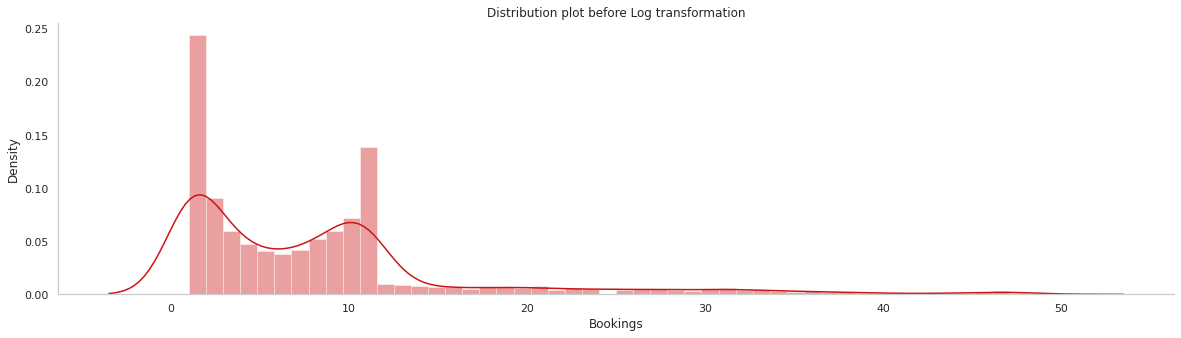

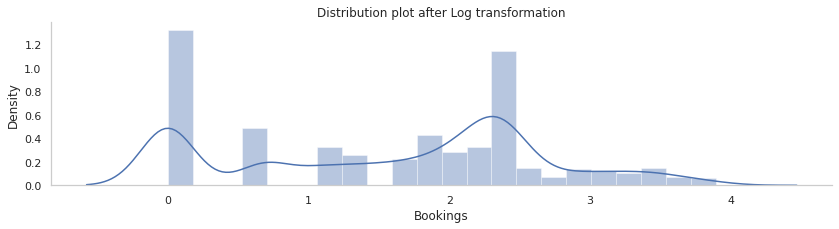

In [ ]:
#Import warning
import warnings
warnings.filterwarnings("ignore")
# Before Log transformation
fig, ax = plt.subplots(figsize=(20, 5))
sns.distplot(a=transport_demand_df['Bookings'],color='#CC1313',label="100% Equities",kde=True,ax=ax)
plt.title("Distribution plot before Log transformation")
sns.despine()
plt.grid(False)
plt.show()
# After Log transformation
sns.distplot(np.log(transport_demand_df['Bookings']))
plt.title("Distribution plot after Log transformation")
sns.despine()
plt.grid(False)
plt.show()




**Capping the outliers**

In [ ]:
#cap the Outliers
transport_demand_df["Bookings"] = np.where(transport_demand_df["Bookings"] >35, 35,transport_demand_df['Bookings'])
transport_demand_df.Bookings.skew()

1.7051362341658254

**Observation**
* Log Transformation on Target or any other transformation will not work for the given feature.
* So we cap the outliers and able to reduce skewness littlebit.

#EDA

**Countplot for categorical features.**

travel_from


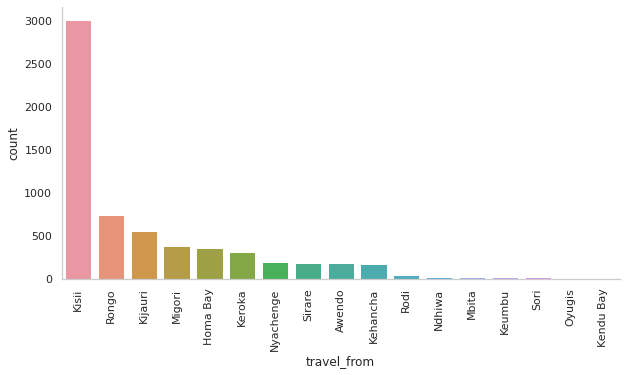

max_capacity


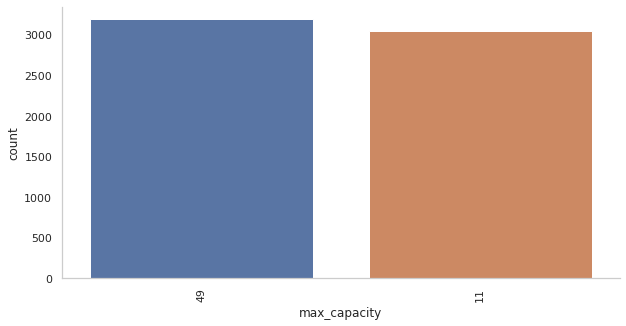

year


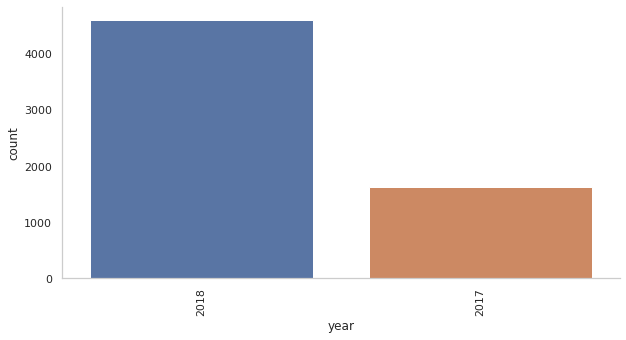

month


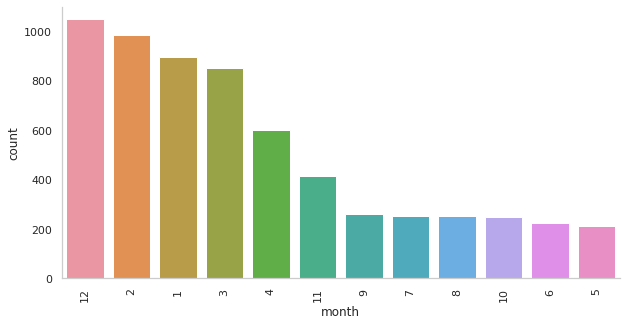

day_ofweek


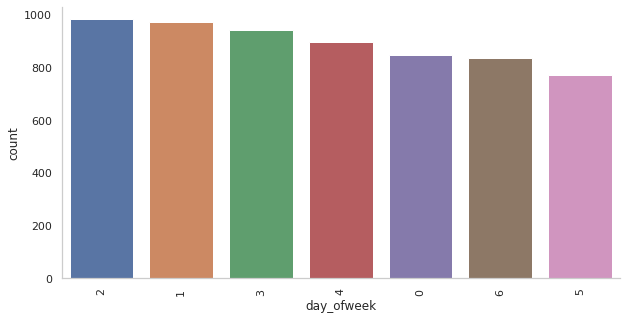

Boarding_period


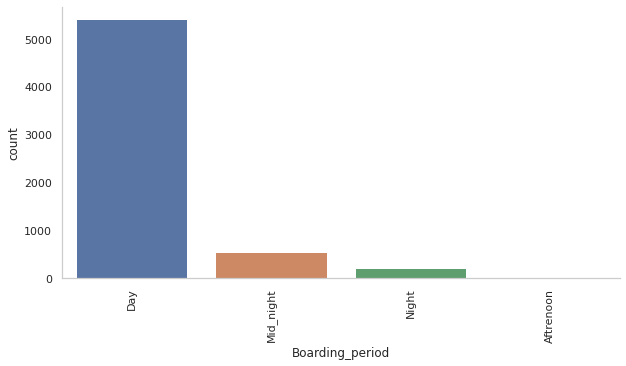

In [ ]:

  
for i in transport_demand_df[["travel_from",	"max_capacity",	"year", "month","day_ofweek",	"Boarding_period"]]:
  print(i)
  fig, ax = plt.subplots(figsize=(10, 5))
  sns.countplot(data=transport_demand_df,x=i,ax=ax,order = transport_demand_df[i].value_counts().index)
  sns.despine()
  plt.grid(False)
  plt.xticks(rotation=90)
  plt.show()

**travel_from**

**Observatio**
* In the dataset Majority of Travelling is between Kissi and Nairibi.also the distribution is imbalance.
* Vehicle type feature looks balance.
* We have more data from the year 2018 than 2017.Imbalance feature.
* The month of jan,feb,march,apr abd december has maximum travellings.need to treat this problem by labelling these month on the basis of distribution.
* There is no pattern in day_ofweek it looks equally distributed(balanced).
* Majority of travelling happens during Day(Imbalance).


**Features Relation With Target variable**
* **travel_from**

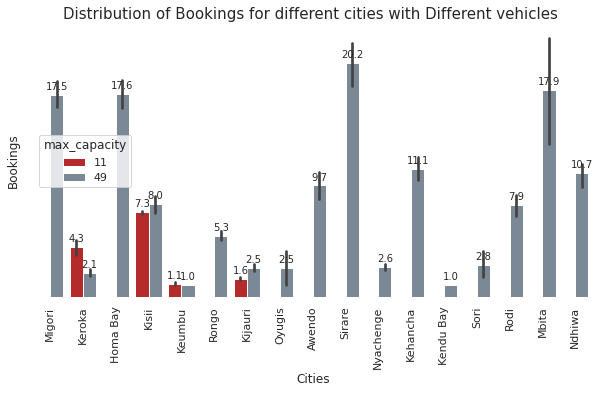

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
bars = sns.barplot(x="travel_from",y=transport_demand_df["Bookings"],hue="max_capacity",palette=['#CC1313','lightslategrey'],data=transport_demand_df,ax=ax)
for i in range(7):
 bars.patches[i]
 plt.xticks(rotation=90)
ax = plt.gca()
for spine in ax.spines.values():
     spine.set_visible(False)
plt.grid(False)
plt.xlabel('Cities')
plt.ylabel('Bookings')
plt.title(f'Distribution of Bookings for different cities with Different vehicles ',size=15)
ax.axes.yaxis.set_ticklabels([])
for bar in bars.patches:
  bars.annotate(format(bar.get_height(),'.1f'),(bar.get_x()+bar.get_width()/2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

**Observation**
* Although the count of Kisii is was higher in count plot but the above plot show there are only single digit Bookings for kisii
* Cities like keroka,kissi,kijauri,keumbu has use of car.
* Top cities with maximum bookings are sirare,Mbita,Homma Bay and Migori.
* Majority of bookings are done for the buses.

**Features Vs Target**
* **day_ofweek**
* **month**
* **year**


[]

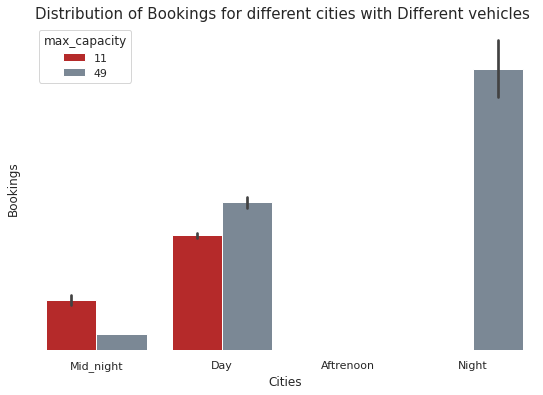

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
bars = sns.barplot(x="Boarding_period",y=transport_demand_df["Bookings"],hue="max_capacity",palette=['#CC1313','lightslategrey'],data=transport_demand_df,ax=ax)
ax = plt.gca()
for spine in ax.spines.values():
     spine.set_visible(False)
plt.grid(False)
plt.xlabel('Cities')
plt.ylabel('Bookings')
plt.title(f'Distribution of Bookings for different cities with Different vehicles ',size=15)
ax.axes.yaxis.set_ticklabels([])


**Observation**
* From the count plot it seems that Day have more travellings but when we check with the total bookings it shows people prefer to travel in night as well.
* During night people prefer Bus.
* there were no travelling during afternoon the reason could be harsh summer of south africa.

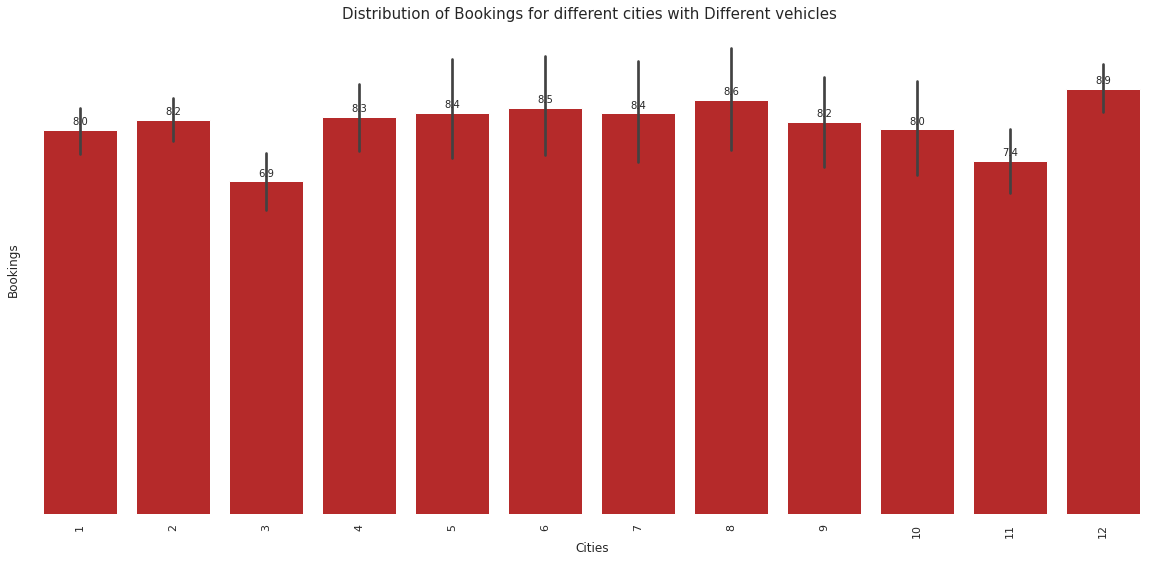

In [ ]:
fig, ax = plt.subplots(figsize=(20, 9))
bars = sns.barplot(x="month",y=transport_demand_df["Bookings"],color='#CC1313',data=transport_demand_df,ax=ax)
for i in range(7):
 bars.patches[i]
 plt.xticks(rotation=90)
ax = plt.gca()
for spine in ax.spines.values():
     spine.set_visible(False)
plt.grid(False)
plt.xlabel('Cities')
plt.ylabel('Bookings')
plt.title(f'Distribution of Bookings for different cities with Different vehicles ',size=15)
ax.axes.yaxis.set_ticklabels([])
for bar in bars.patches:
  bars.annotate(format(bar.get_height(),'.1f'),(bar.get_x()+bar.get_width()/2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

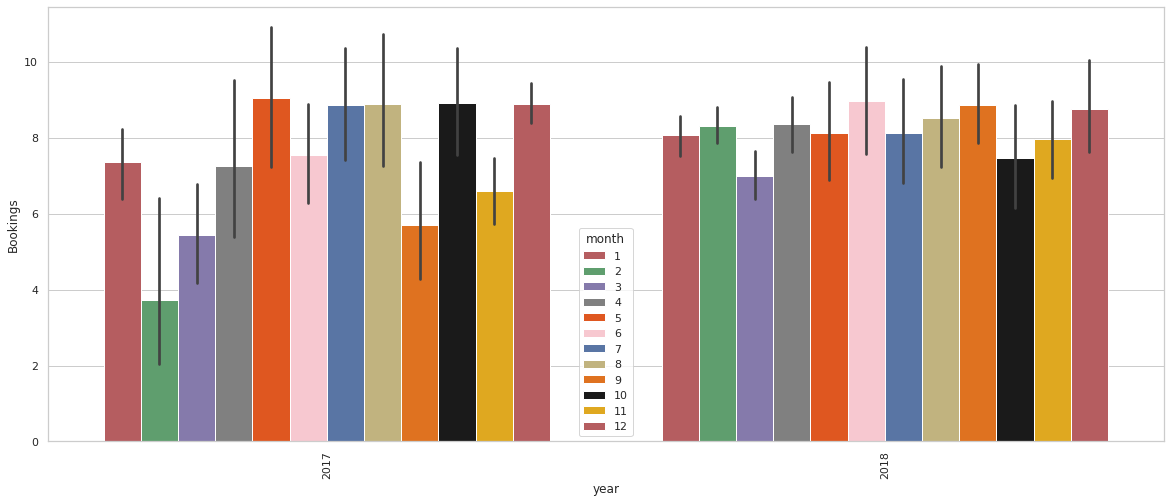

In [ ]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (20,8)},style='whitegrid')
sns.barplot(x = 'year',y = 'Bookings',hue="month",data = transport_demand_df,palette=["r","g","m","grey","C1","pink","b","y", "C2", "k","C10"])
plt.xticks(rotation=90) 
for bar in bars.patches:
  bars.annotate(format(bar.get_height(),'.1f'),(bar.get_x()+bar.get_width()/2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
# Show the plot
plt.show()

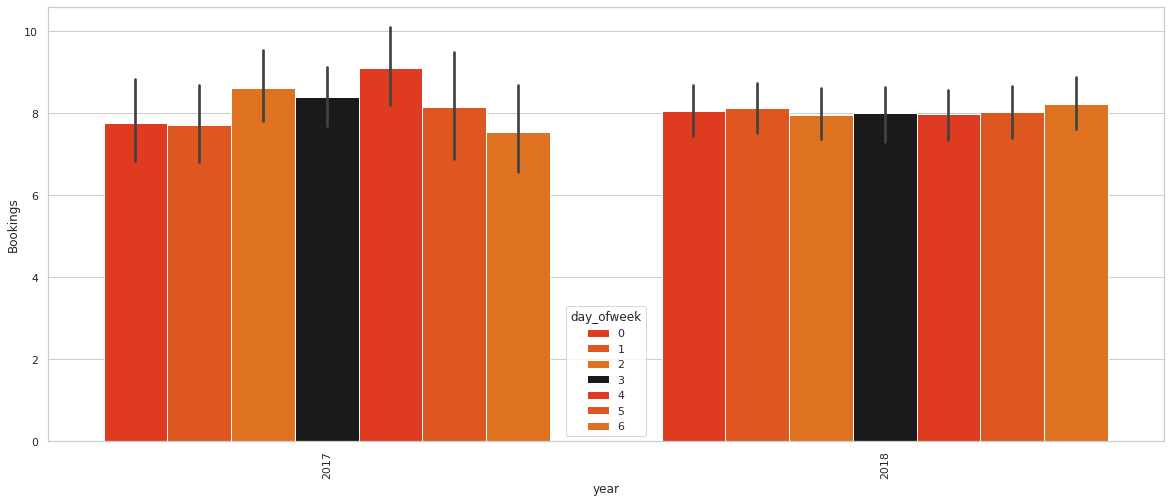

In [ ]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (20,8)},style='whitegrid')
sns.barplot(x = 'year',y = 'Bookings',hue="day_ofweek",data = transport_demand_df,palette=["C0", "C1", "C2", "k"])
plt.xticks(rotation=90) 
# Show the plot
plt.show()

**Observation**
* little Higher Travelling patter during December can back by festivals(christmas).
* although we have less data for year 2017. still the travlling patter show approx same for both which shows there were more rides during 2017.
* there is no such pattern which indicate trend of travelling during weekends or during weekdays. 



**Note**
* There is a kind of illusion when we see count of values in different features and feature with bookings.
* The graphs with count values have a kind of incresing patter but with bookigs it is normal distributed
* **The main reason behind this is the higher count of value 1 in some features.like kisii has maximum bookings of 1 ticket.** 


**Data set Distribution**

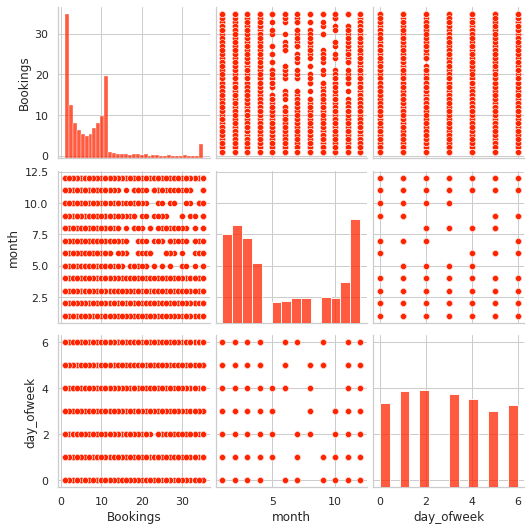

In [ ]:

# visualize the relationship between the features and the response using scatterplots
Plot=transport_demand_df[["Bookings","Boarding_period",'travel_from', 'month','day_ofweek']]
sns.pairplot(Plot)
plt.show()

**Observation**
* we can clearly see this dataset has low or no linear relation.


#Feature Transform and Selection
We will use three methods for feature selection:

* Remove collinear features
* Remove features with greater than a threshold percentage of missing values
* Keep only the most relevant features using feature importances from a model


In [ ]:
transport_demand_df.month.value_counts()

12    1047
2      984
1      895
3      852
4      599
11     414
9      261
7      252
8      251
10     246
6      225
5      210
Name: month, dtype: int64

In [ ]:
#labelling month in ordinal
month_dict = {1:2,2:3,3:2,4:2,5:1,6:1,7:1,8:1,9:1,10:1,11:2,12:3}
day_ofweek_dict = {1:"MON",2:"TUE",3:"WED",4:"THRU",5:"FRI",6:"SAT",0:"SUN"}
transport_demand_df['month'].replace(month_dict,inplace=True)
transport_demand_df['day_ofweek'].replace(day_ofweek_dict,inplace=True)

**Labelling max_capacity**

In [ ]:
transport_demand_df.max_capacity.value_counts()

49    3188
11    3048
Name: max_capacity, dtype: int64

In [ ]:
fil1 = transport_demand_df['max_capacity'] == 49
fil2= transport_demand_df["max_capacity"]==11
transport_demand_df.loc[fil1, 'max_capacity'] = 1
transport_demand_df.loc[fil2,'max_capacity']=2
transport_demand_df['max_capacity'].value_counts()

1    3188
2    3048
Name: max_capacity, dtype: int64

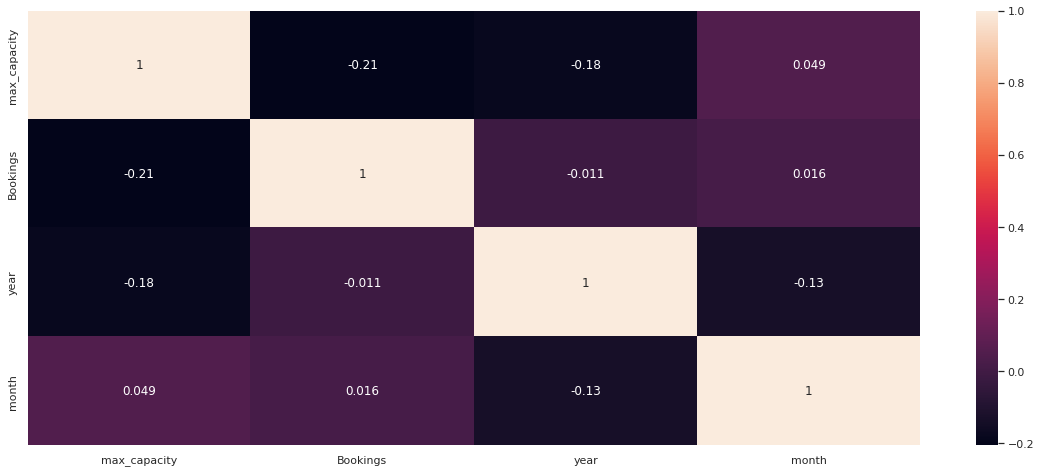

In [ ]:
sns.heatmap(transport_demand_df.corr(),annot=True)
plt.show()

In [ ]:
transport_demand_df.drop(["year"],axis=1,inplace=True)

In [ ]:
transport_demand_df.head()

,travel_from,max_capacity,Bookings,month,day_ofweek,Boarding_period
0,Migori,1,1,1,MON,Day
1,Migori,1,1,2,SAT,Day
2,Keroka,1,1,2,SAT,Day
3,Homa Bay,1,5,2,SUN,Day
4,Migori,1,31,2,SUN,Day


**One Hot Encoding and Feature selection using Random Forest**

In [ ]:
one_hot = pd.get_dummies(transport_demand_df[["travel_from","Boarding_period","day_ofweek"]],drop_first=True)
one_hot=pd.DataFrame(one_hot)
one_hot

,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,...,travel_from_Sori,Boarding_period_Day,Boarding_period_Aftrenoon,Boarding_period_Night,day_ofweek_MON,day_ofweek_SAT,day_ofweek_SUN,day_ofweek_THRU,day_ofweek_TUE,day_ofweek_WED
0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6244,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6245,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
6246,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6247,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

features = np.array(one_hot.columns)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(one_hot, transport_demand_df["Bookings"])
# inverse_log=np.expm1(y_test)

RandomForestClassifier()

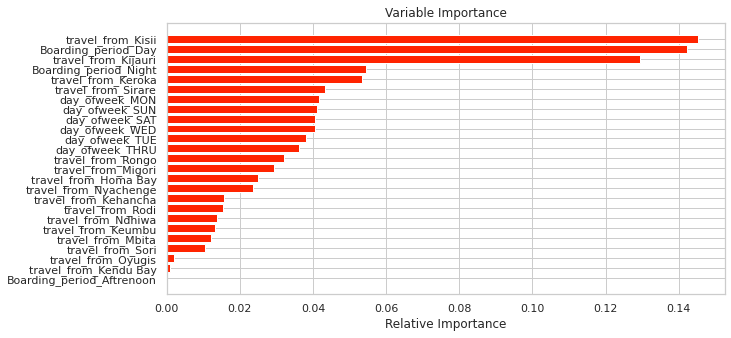

In [ ]:
# from the calculated importances, order them from most to least important
# and make a barplot so we can visualize what is/isn't important
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)
plt.figure(figsize=(10, 5))
padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

**Imp Features**

In [ ]:
['travel_from_Homa Bay', 
       'travel_from_Keroka',  'travel_from_Kijauri',
       'travel_from_Kisii', 'travel_from_Migori',
        'travel_from_Nyachenge', 
       'travel_from_Rongo', 'travel_from_Sirare',
       'Boarding_period_Day', 
       'Boarding_period_Night', 'day_ofweek_MON', 'day_ofweek_SAT',
       'day_ofweek_SUN', 'day_ofweek_THRU', 'day_ofweek_TUE',
       'day_ofweek_WED']

['travel_from_Homa Bay',
 'travel_from_Keroka',
 'travel_from_Kijauri',
 'travel_from_Kisii',
 'travel_from_Migori',
 'travel_from_Nyachenge',
 'travel_from_Rongo',
 'travel_from_Sirare',
 'Boarding_period_Day',
 'Boarding_period_Night',
 'day_ofweek_MON',
 'day_ofweek_SAT',
 'day_ofweek_SUN',
 'day_ofweek_THRU',
 'day_ofweek_TUE',
 'day_ofweek_WED']

In [ ]:
#Remoce bottom 8 features
one_hot_imp=one_hot.copy()
one_hot_imp=one_hot[[ 'travel_from_Homa Bay','travel_from_Keroka','travel_from_Kijauri',
       'travel_from_Kisii', 'travel_from_Migori','travel_from_Nyachenge','travel_from_Rongo', 'travel_from_Sirare',
       'Boarding_period_Day','Boarding_period_Night', 'day_ofweek_MON', 'day_ofweek_SAT',
       'day_ofweek_SUN', 'day_ofweek_THRU', 'day_ofweek_TUE','day_ofweek_WED' ]]
one_hot_imp.head()        

,travel_from_Homa Bay,travel_from_Keroka,travel_from_Kijauri,travel_from_Kisii,travel_from_Migori,travel_from_Nyachenge,travel_from_Rongo,travel_from_Sirare,Boarding_period_Day,Boarding_period_Night,day_ofweek_MON,day_ofweek_SAT,day_ofweek_SUN,day_ofweek_THRU,day_ofweek_TUE,day_ofweek_WED
0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
transport_demand_df.head()

,travel_from,max_capacity,Bookings,month,day_ofweek,Boarding_period
0,Migori,1,1,1,MON,Day
1,Migori,1,1,2,SAT,Day
2,Keroka,1,1,2,SAT,Day
3,Homa Bay,1,5,2,SUN,Day
4,Migori,1,31,2,SUN,Day


In [ ]:
Processed_df = pd.concat([transport_demand_df[["Bookings","max_capacity","month"]], one_hot_imp], axis=1)
Processed_df

,Bookings,max_capacity,month,travel_from_Homa Bay,travel_from_Keroka,travel_from_Kijauri,travel_from_Kisii,travel_from_Migori,travel_from_Nyachenge,travel_from_Rongo,travel_from_Sirare,Boarding_period_Day,Boarding_period_Night,day_ofweek_MON,day_ofweek_SAT,day_ofweek_SUN,day_ofweek_THRU,day_ofweek_TUE,day_ofweek_WED
0,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
1,1,1,2,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
2,1,1,2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,5,1,2,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,31,1,2,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6244,11,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6245,11,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
6246,1,1,2,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
6247,1,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


**Observation**
* we have selected only important features which we extarcted.

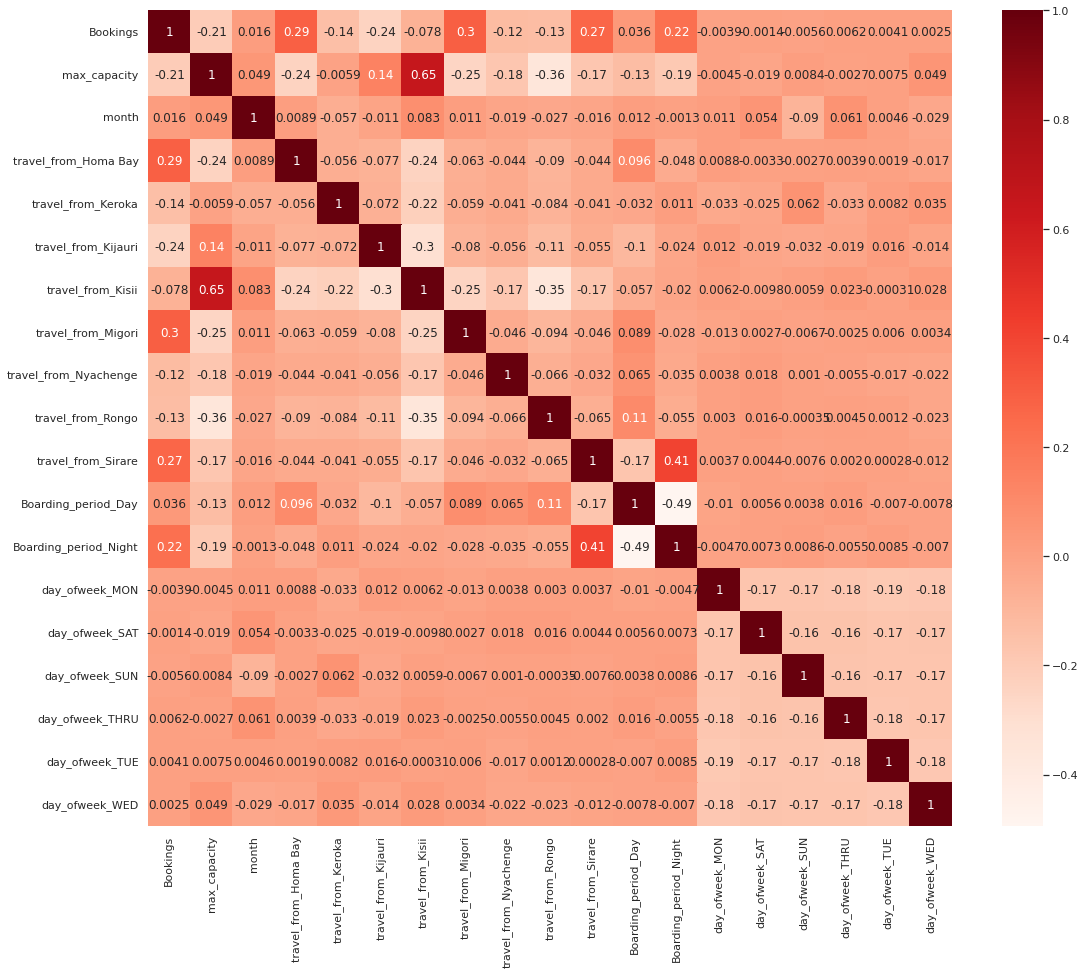

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(18,15))
cor =Processed_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**Observatio**
* we have no multicollinearity in the final dataset.

#Train Test Split

In [ ]:
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
y = Processed_df['Bookings']
X = Processed_df.drop(['Bookings'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
X_train.columns

Index(['max_capacity', 'month', 'travel_from_Homa Bay', 'travel_from_Keroka',
       'travel_from_Kijauri', 'travel_from_Kisii', 'travel_from_Migori',
       'travel_from_Nyachenge', 'travel_from_Rongo', 'travel_from_Sirare',
       'Boarding_period_Day', 'Boarding_period_Night', 'day_ofweek_MON',
       'day_ofweek_SAT', 'day_ofweek_SUN', 'day_ofweek_THRU', 'day_ofweek_TUE',
       'day_ofweek_WED'],
      dtype='object')

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#train test shape
X_train.shape, X_test.shape


((4988, 18), (1248, 18))


#Ml Models Used.
* **Linear Regression**
* **Support Vector Machine**
* **Decision Treee Regressor**
* **Random Forest**
* **Extreme Gradient Boosting**

In [ ]:
from sklearn import metrics

#Evaluate matrices
def print_evaluate(true, predicted):  
    '''This function will print the evaluation matrics values 
    '''
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    


#Linear Regression.

In [ ]:

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
LR_model = LinearRegression(normalize=True)
LR_model.fit(X_train,y_train)
print(LR_model.coef_,"\n","Intercept/offset",LR_model.intercept_)
print("\n")
LR_test_pred = LR_model.predict(X_test)

LR_train_pred = LR_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, LR_test_pred)
print("Adjusted R2:-",1 - (1-LR_model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("\n____________________________________________")
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, LR_train_pred)
print("Adjusted R2:-",1 - (1-LR_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

[ 9.67744085e-01  9.45772227e-02  7.50490147e+00 -7.16895516e+00
 -8.28442286e+00 -3.21415608e+00  7.07417471e+00 -7.24045280e+00
 -4.50749384e+00  6.86030850e+00  2.83396536e+00  9.92642104e+00
 -1.94376804e-01 -6.29681393e-01 -3.36254873e-01 -1.54432487e-01
 -7.82950956e-02  4.35243749e-03] 
 Intercept/offset 7.256662604538973


Test set evaluation:
_____________________________________
MAE: 4.504879056466651
MSE: 40.31026747510075
RMSE: 6.349036736001828
R2 Square 0.3979374228369664
__________________________________
Adjusted R2:- 0.3891195819997535

____________________________________________
Train set evaluation:
_____________________________________
MAE: 4.591382663366534
MSE: 41.02068599461426
RMSE: 6.40473933853785
R2 Square 0.36281082795017294
__________________________________
Adjusted R2:- 0.3605026361415803


Text(0.5, 0, 'Index')

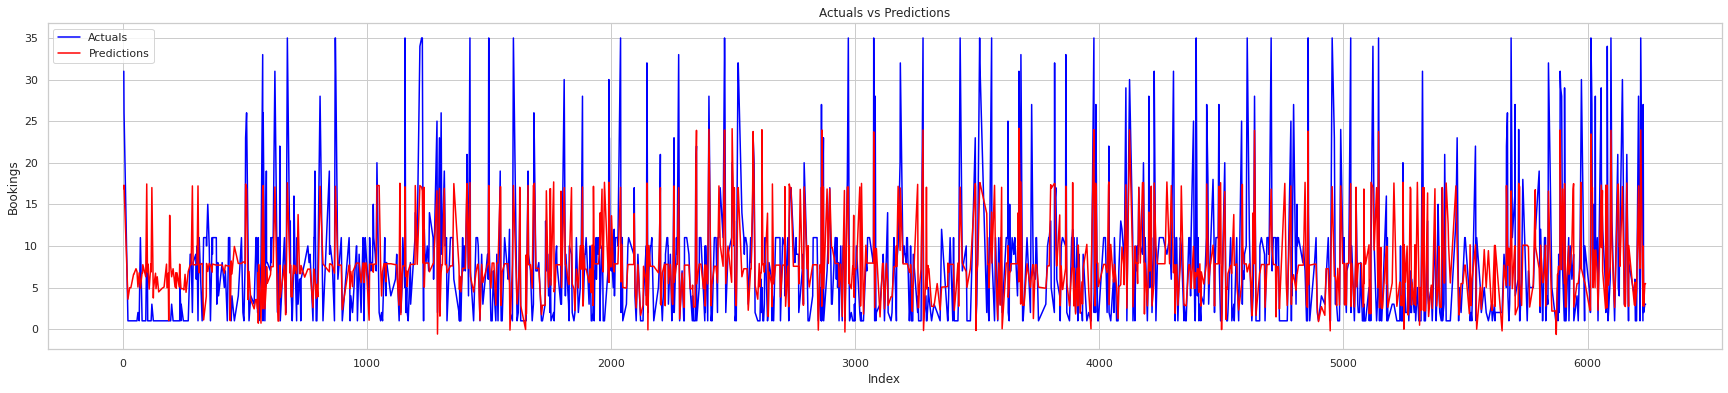

In [ ]:
fig, ax=plt.subplots(figsize=(30,6))
sns.lineplot(x=y_test.index,y=y_test,label='Actuals',color='blue',ax=ax)
sns.lineplot(x=y_test.index,y=LR_test_pred,label='Predictions',color='red',ax=ax)
ax.set_title('Actuals vs Predictions')
ax.set_ylabel('Bookings')
ax.set_xlabel('Index')

**Observation**
* We can clearly see model is not able to predict properly.

#SVM
* Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin).
*The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences. 
* The main idea is to minimize error, individualizing the hyperplane which maximizes the margin, keeping in mind that part of the error is tolerated.

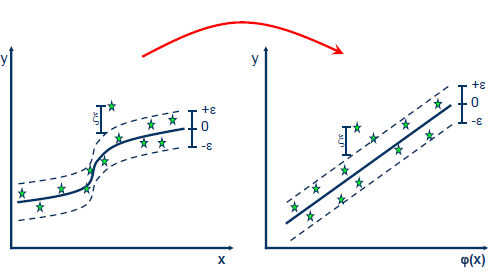

In [ ]:
from sklearn.svm import SVR
#C parameter in SVM is Penalty parameter of the error term. 
svm_reg = SVR(kernel='rbf', C=100, epsilon=0.1)#The value of epsilon determines the width of the tube around the estimated function (hyperplane).
svm_reg.fit(X_train, y_train)

svr_test_pred = svm_reg.predict(X_test)
svr_train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, svr_test_pred)
print("Adjusted R2:-",1 - (1-svm_reg.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("\n____________________________________________")
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, svr_train_pred)
print("Adjusted R2:-",1 - (1-svm_reg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

Test set evaluation:
_____________________________________
MAE: 3.9930694713137123
MSE: 42.83609129305114
RMSE: 6.544928669821478
R2 Square 0.3602124437547931
__________________________________
Adjusted R2:- 0.3508420808480285

____________________________________________
Train set evaluation:
_____________________________________
MAE: 3.813723990514393
MSE: 39.39906556299327
RMSE: 6.276867496051934
R2 Square 0.38800004541814326
__________________________________
Adjusted R2:- 0.38578310052330056


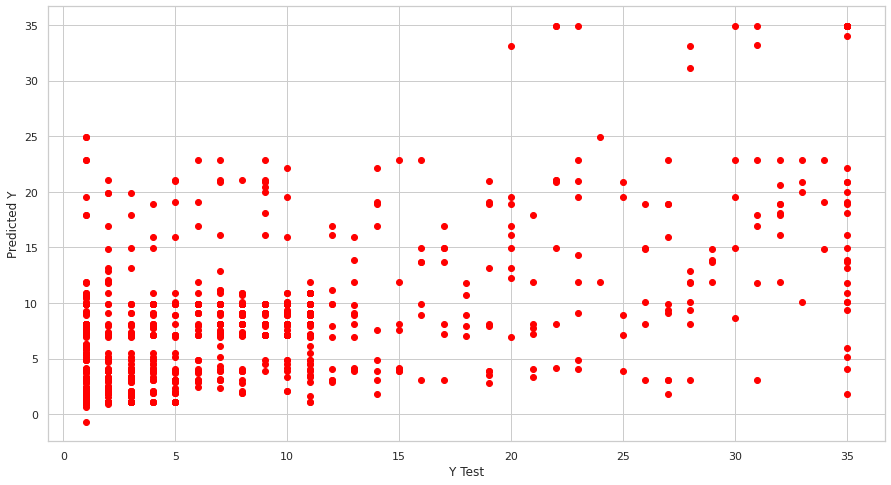

In [ ]:
predictions = svm_reg.predict(X_test)
predictions= predictions.reshape(-1,1)

plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [ ]:
# pd.DataFrame([y_test,svr_test_pred])

Text(0.5, 0, 'Index')

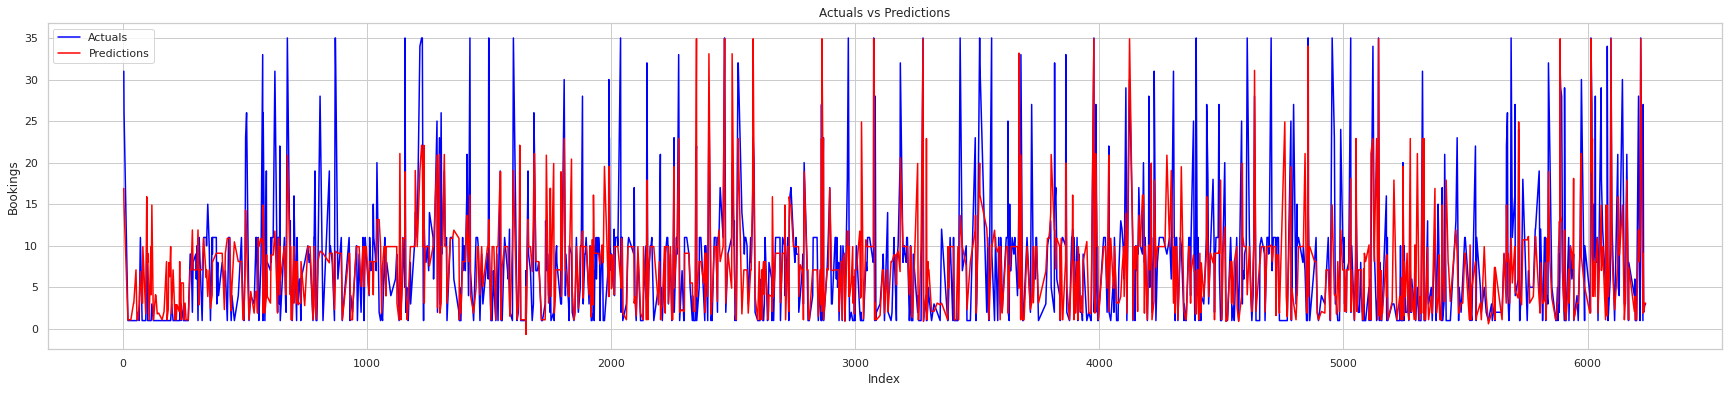

In [ ]:
fig, ax=plt.subplots(figsize=(30,6))
sns.lineplot(x=y_test.index,y=y_test,label='Actuals',color='blue',ax=ax)
sns.lineplot(x=y_test.index,y=svr_test_pred,label='Predictions',color='red',ax=ax)
ax.set_title('Actuals vs Predictions')
ax.set_ylabel('Bookings')
ax.set_xlabel('Index')

#Decision Treee Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DT_reg = DecisionTreeRegressor(random_state = 0,max_depth=50,max_leaf_nodes=50)
DT_reg.fit(X_train,y_train)

DT_test_pred = DT_reg.predict(X_test)
DT_train_pred = DT_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, DT_test_pred)
print("Adjusted R2:-",1 - (1-DT_reg.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, DT_train_pred)
print("Adjusted R2:-",1 - (1-DT_reg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

Test set evaluation:
_____________________________________
MAE: 4.217669593257603
MSE: 38.24625720771772
RMSE: 6.184355844202185
R2 Square 0.4287648873691521
__________________________________
Adjusted R2:- 0.4203985472329802
Train set evaluation:
_____________________________________
MAE: 4.171020787529429
MSE: 36.76230808142866
RMSE: 6.063192894954659
R2 Square 0.42895775433590566
__________________________________
Adjusted R2:- 0.42688917707248164


#Random Forest
* A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees.
* It is a technique called Bootstrap Aggregation, commonly known as bagging.

* Bagging, in the Random Forest method, involves training each decision tree on a different data sample where sampling is done with replacement.
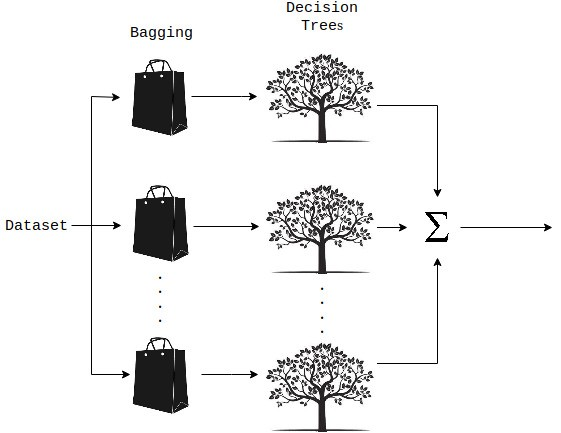

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RDM_forest_reg = RandomForestRegressor(n_estimators =1500)
RDM_forest_reg.fit(X_train, y_train)
RDM_test_pred = RDM_forest_reg.predict(X_test)
RDM_train_pred = RDM_forest_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, RDM_test_pred)
print("Adjusted R2:-",1 - (1-RDM_forest_reg.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, RDM_train_pred)
print("Adjusted R2:-",1 - (1-RDM_forest_reg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

Test set evaluation:
_____________________________________
MAE: 4.197051359682408
MSE: 39.564087269685174
RMSE: 6.289998988051204
R2 Square 0.40908215606846965
__________________________________
Adjusted R2:- 0.40042754159266203
Train set evaluation:
_____________________________________
MAE: 4.043790903735745
MSE: 35.38268807257452
RMSE: 5.948334899160816
R2 Square 0.450387891591547
__________________________________
Adjusted R2:- 0.4483969441269964


**Random Forest with HyperParameter Parameter tuning.**

In [ ]:
#Parameter
n_estimators = [500] # number of trees in the random forest
max_features = [0.4,0.5,0.6,0.7,0.8,0.9,1] 
# number of features in consideration at every split
max_samples = [0.4,0.5,0.6,0.7,0.8,0.9,1]
max_depth = [50,70,90,110] # maximum number of levels allowed in each decision tree
# min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1,2,3,4,5,6, 7,8,9,10,11,12,13,14,15]
# min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

# 'min_samples_s': min_samples_,

'min_samples_leaf': min_samples_leaf,
"max_samples" : max_samples,

'bootstrap': bootstrap}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator =RDM_forest_reg ,param_distributions = random_grid,
               n_iter = 100, cv = 15, verbose=2, random_state=35, n_jobs = -1)


rf_random.fit(X_train, y_train)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


RandomizedSearchCV(cv=15, estimator=RandomForestRegressor(n_estimators=1500),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [50, 70, 90, 110],
                                        'max_features': [0.4, 0.5, 0.6, 0.7,
                                                         0.8, 0.9, 1],
                                        'max_samples': [0.4, 0.5, 0.6, 0.7, 0.8,
                                                        0.9, 1],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15],
                                        'n_estimators': [500]},
                   random_state=35, verbose=2)

In [ ]:
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_)

Best Parameters:  {'n_estimators': 500, 'min_samples_leaf': 13, 'max_samples': 0.5, 'max_features': 0.6, 'max_depth': 50, 'bootstrap': True}


In [ ]:
RDM_forest_hyper = RandomForestRegressor(n_estimators = 500, min_samples_leaf = 13,max_samples=0.5, max_features = 0.6, max_depth= 50, bootstrap=True) 
RDM_forest_hyper.fit( X_train, y_train) 

RDM_hyper_test_pred = RDM_forest_hyper.predict(X_test)
RDM_hyper_train_pred = RDM_forest_hyper.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, RDM_hyper_test_pred)
print("Adjusted R2:-",1 - (1-RDM_forest_hyper.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, RDM_hyper_train_pred)
print("Adjusted R2:-",1 - (1-RDM_forest_hyper.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))


Test set evaluation:
_____________________________________
MAE: 4.2223533855249675
MSE: 37.71418379878287
RMSE: 6.141187490932261
R2 Square 0.43671178298380187
__________________________________
Adjusted R2:- 0.42846183350756784
Train set evaluation:
_____________________________________
MAE: 4.244201561670913
MSE: 37.494371629500705
RMSE: 6.1232647851861435
R2 Square 0.417586346111647
__________________________________
Adjusted R2:- 0.41547657638534585


#XGB(Extreme Gradient Boosting)
* XGBoost is an implementation of the Gradient Boosted Decision Trees algorithm What is Gradient Boosted Decision Trees? We'll walk through a diagram.

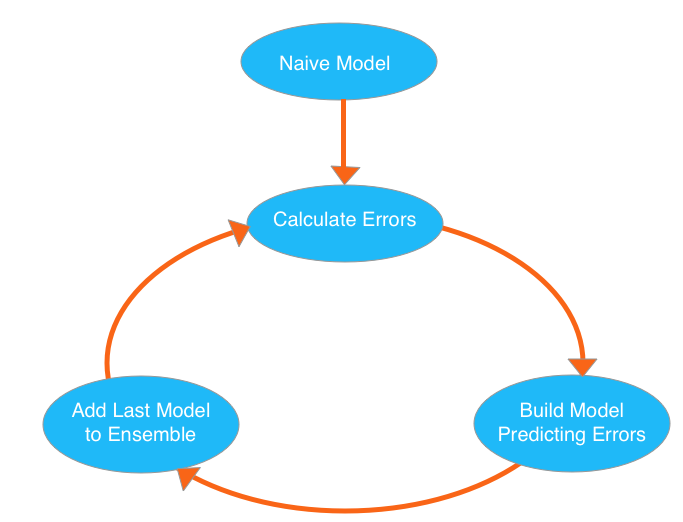

* We start the cycle by calculating the errors for each observation in the dataset. We then build a new model to predict those. We add predictions from this error-predicting model to the "ensemble of models."

* To make a prediction, we add the predictions from all previous models. We can use these predictions to calculate new errors, build the next model, and add it to the ensemble.

* There's one piece outside that cycle. We need some base prediction to start the cycle. In practice, the initial predictions can be pretty naive. Even if it's predictions are wildly inaccurate, subsequent additions to the ensemble will address those errors.




In [ ]:
import xgboost as xgb
XGB= xgb.XGBRegressor(              )
XGB.fit(X_train, y_train)
XGB_train_pred=XGB.predict(X_train)
XGB_test_pred = XGB.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, XGB_test_pred)
print("Adjusted R2:-",1 - (1-XGB.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, XGB_train_pred)
print("Adjusted R2:-",1 - (1-XGB.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

  

[09:48:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test set evaluation:
_____________________________________
MAE: 4.303941490271916
MSE: 37.696373458417966
RMSE: 6.139737246692074
R2 Square 0.436977793112037
__________________________________
Adjusted R2:- 0.42873173963442646
Train set evaluation:
_____________________________________
MAE: 4.319470310794323
MSE: 37.720876480670775
RMSE: 6.141732368043301
R2 Square 0.4140679642249747
__________________________________
Adjusted R2:- 0.4119454493036726


In [ ]:
#Hyperparameter
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

import xgboost as xgb

xgb = xgb.XGBRegressor(random_state=0)          

In [ ]:
#Grid search
from sklearn.model_selection import GridSearchCV

reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[09:48:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:15] WARNING: /workspace/src/objective/regre

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
                         'min_child_weight': [10, 20]},
             verbose=1)

In [ ]:
#best parameter.
reg_gs.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'eta': 0.004,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 7,
 'min_child_weight': 20,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
#Optimising XGB with Best Hyperparameter.
XGB_optimal_model =reg_gs.best_estimator_

XGB_optimal_model.fit(X_train, y_train)
XGB_hyper_train_pred=XGB_optimal_model.predict(X_train)
XGB_hyper_test_pred = XGB_optimal_model.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, XGB_hyper_test_pred)
print("Adjusted R2:-",1 - (1-XGB_optimal_model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, XGB_hyper_train_pred)
print("Adjusted R2:-",1 - (1-XGB_optimal_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

  

[09:48:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test set evaluation:
_____________________________________
MAE: 4.17255732187858
MSE: 37.90257129974761
RMSE: 6.156506420020011
R2 Square 0.43389808137772357
__________________________________
Adjusted R2:- 0.42560692227666497
Train set evaluation:
_____________________________________
MAE: 4.1474567285612665
MSE: 36.399133497661786
RMSE: 6.033169440489948
R2 Square 0.4345990766767933
__________________________________
Adjusted R2:- 0.4325509348736504


**Model Comparison**

In [ ]:
#ML Algorithms Comparision.
MLA_columns = {
               "LinearRegression":[round(metrics.r2_score(y_test,LR_test_pred)*100,2),round(metrics.r2_score(y_train,LR_train_pred)*100,2)],
               "SVM_Regressor":[round(metrics.r2_score(y_test,svr_test_pred)*100,2),round(metrics.r2_score(y_train,svr_train_pred)*100,2)],
               "DT_Regressor":[round(metrics.r2_score(y_test,DT_test_pred)*100,2),round(metrics.r2_score(y_train,DT_train_pred)*100,2)],
               "Random_forest":[round(metrics.r2_score(y_test,RDM_test_pred)*100,2),round(metrics.r2_score(y_train,RDM_train_pred)*100,2)] ,            
                "Random_forest_Hyper":[round(metrics.r2_score(y_test,RDM_hyper_test_pred)*100,2),round(metrics.r2_score(y_train,RDM_hyper_train_pred)*100,2)],
                "XGB":[round(metrics.r2_score(y_test,XGB_test_pred)*100,2),round(metrics.r2_score(y_train,XGB_train_pred)*100,2)],
                "XGB_Hyper":[round(metrics.r2_score(y_test,XGB_hyper_test_pred)*100,2),round(metrics.r2_score(y_train,XGB_hyper_train_pred)*100,2)],
               }
              
MLA_compare = pd.DataFrame(MLA_columns,index = ["Test_R2","Train_R2"])
MLA_compare.T

,Test_R2,Train_R2
LinearRegression,39.79,36.28
SVM_Regressor,36.02,38.80
DT_Regressor,42.88,42.90
Random_forest,40.91,45.04
Random_forest_Hyper,43.67,41.76
XGB,43.70,41.41
XGB_Hyper,43.39,43.46


**Conclusion**
* Data set is complex and challenging to work with.
* Independent and dependent variable are not following any of the linearity asuumptions.
* Feature selection help us greatly in reducing the overfiting.
* we have applied basic to advance ensemble models over our dataset non of them able to predict more than 46%.

* Out of the total models we trained we are able to fetch better result with Tree base algorithms only and thats too with very sort margin.

* The obious reason behind this low accuracy is the dataset which has features which does not follow any of the linearity assumptions.

* The other major reason could be lack of proper availability of important features.
